In [67]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

np.random.seed(42)  # for reproducibility
sns.set(rc={"figure.figsize": (8, 8)})
sns.set_style("ticks")

For comparing different metrics, we will use the [Breast Cancer Dataset](https://goo.gl/U2Uwz2) which is provided by sckit-learn in `dataset` module. This dataset is used for binary classification between two types of cancer.

In [69]:
data = load_breast_cancer()
print(data.DESCR[:760])  # print short description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline app


Target classes i.e. types of cancer.

In [70]:
print(f"Types of cancer (targets) are {data.target_names}")

Types of cancer (targets) are ['malignant' 'benign']


What is the dimension of data?  We see there are **569 examples** and each example has **30 features**.  
The **target** variable is binary (**0 and 1** for `malignant` and `benign`).   
We will consider `benign` as `positive` class, and `malignant` as `negative` class.  
We can understand it as:  
`0 for is_not_benign`  
`1 for is_benign`

In [72]:
X = data.data  # features
y = data.target  # labels
print(f"Shape of features is {X.shape}, and shape of target is {y.shape}")

Shape of features is (569, 30), and shape of target is (569,)


In [74]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

### Split the data
Since we shouldn't train and test our model with the same dataset, it is always a good idea to split the data in three parts - train data, test data, and validation data.  
We won't require validation data here.
We split the dataset into training and testing data, with 369 examples for training, and 200 examples for testing.

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)

In [77]:
y_train[:10]

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0])

### Training and predicting data

Let us use scikit's Support Vector Machines classifier to predict whether its a benign cancer.  
`SVC` classifier is used from `sklearn.svm`.

In [78]:
classifier = svm.SVC(kernel='linear', probability=True)

Next we fit/train the model on our _training dataset_. It trains quite fast since we are working with relatively small dataset.

In [79]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Now save the prediction results both as probability and as classes.  
**`y_preds`** is a **1D vector** of one of `{0, 1}` values, denoting predictions as malignant and benign, respectively.  
**`y_proba`** is a **2D vector**, where for each example, it contains a vector of length 2,  
`[prob. of malignant, prob. of benign]`

In [80]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)

In [84]:
y_preds

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1])

We need to reshape `y_proba` to a 1D vector denoting the probability of having  `benign` cancer.

In [85]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))

In [86]:
y_proba[:5], y_preds[:5], y_test[:5]

(array([8.26913718e-01, 9.13681668e-04, 5.18713674e-02, 9.92224112e-01,
        9.99983483e-01]), array([1, 0, 0, 1, 1]), array([1, 0, 0, 1, 1]))

### Confusion Matrix

Let us calculate confusion matrix of the predictions. It is implemented in Scikit-learn's [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [87]:
conf = metrics.confusion_matrix(y_test, y_preds)
conf

array([[ 66,   5],
       [  4, 125]])

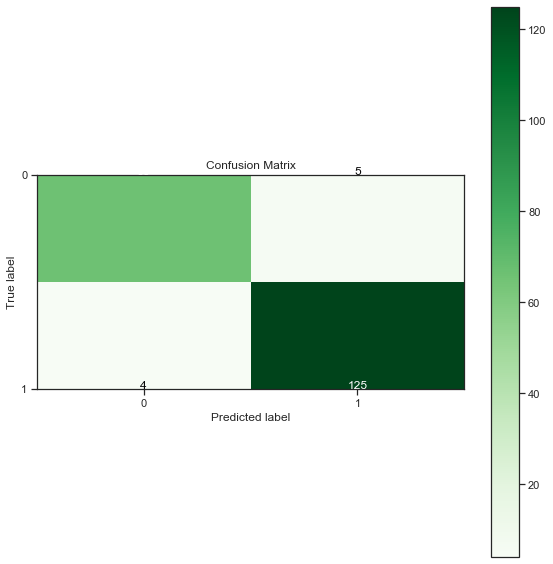

In [88]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

From the confusion matrix, we can see the number of examples predicted correct by our classifier, for both classes seperately.  
We can get the numbers of `True Positives, True Negatives, False Positives, and False Negatives` from this confusion matrix.   
Lets store these terms in some variables.

In [90]:
# from the confusion matrix
TP = true_pos = 125
TN = true_neg = 66
FP = false_pos = 4
FN = false_neg = 5

### Some basic metrics

Now, we will calculate some basic metrics from these four values.  
We will need a dictionary to store these metrics. Lets create a dictionary `results`.

In [91]:
results = {}

#### Accuracy 
number of examples correctly predicted / total number of examples  

$$
ACC=\frac{TP+TN}{TP+FP+TN+FN}
$$

In [93]:
metric = "ACC"
#results[metric] = (TP + TN) / (TP + TN + FP + FN)
results[metric] = metrics.accuracy_score(y_test, y_preds)
print("{0:s} is {1:.3f}".format(metric, results[metric]))

ACC is 0.955


#### True Positive Rate (Recall)
number of `Positive` samples actually predicted as  `Positive` / total number of `Positive` samples

$$
TPR=\frac{TP}{TP+FN}
$$



In [94]:
# Recall
metric = "TPR"
#results[metric] = TP / (TP + FN)
results[metric] = metrics.recall_score(y_test, y_preds)
print("{0:s} is {1:.3f}".format(metric, results[metric]))

TPR is 0.969


#### True Negative Rate (Specificity)
number of `Negative` samples actually predicted as  `Negative` / total number of `Negative` samples    

$$
TNR = \frac{TN}{TN+FP}
$$

In [96]:
metric = "TNR"
results[metric] = TN / (TN + FP)
print("{0:s} is {1:.3f}".format(metric, results[metric]))

TNR is 0.943


#### False Positive Rate
number of `Negative` samples actually predicted as  `Positive` / total number of `Negative` samples  
Also called **Specificity**.  

$$
FPR = \frac{FP}{TN+FP}
$$

In [97]:
metric = "FPR"
results[metric] = FP / (TN + FP)
print("{0:s} is {1:.3f}".format(metric, results[metric]))

FPR is 0.057


#### False Negative Rate
number of `Positive` samples actually predicted as  `Negative` / total number of `Positive` samples  
Also called **Specificity**.  

$$
FNR = \frac{FN}{TP+FN}
$$

In [98]:
metric = "FNR"
results[metric] = FN / (TP + FN)
print("{0:s} is {1:.3f}".format(metric, results[metric]))

FNR is 0.038


#### Positive Predictive Value (Precision)
number of samples actually and predicted as  `Positive` / total number of samples predicted as `Positive`  
  
$$
PPV = \frac{TP}{TP+FP}
$$


In [99]:
# Precision
metric = "PPV"
#results[metric] = TP / (TP + FP)
results[metric] = metrics.recall_score(y_test, y_preds)
print("{0:s} is {1:.3f}".format(metric, results[metric]))

PPV is 0.969


#### Negative Predictive Value
number of samples actually and predicted as  `Negative` / total number of samples predicted as `Negative` 

$$
NPV = \frac{TN}{TN+FN}
$$


In [100]:
metric = "NPV"
results[metric] = TN / (TN + FN)
print("{0:s} is {1:.3f}".format(metric, results[metric]))

NPV is 0.930


#### F1 score
Harmonic Mean of Precision and Recall.  

$$
F_1=2\frac{\text{precision}\cdot \text{recall}}{\text{precision}+\text{recall}}
$$

In [102]:
metric = "F1"
#results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
results[metric] = metrics.f1_score(y_test, y_preds)
print("{0:s} is {1:.3f}".format(metric, results[metric]))

F1 is 0.965


#### F beta score
Harmonic Mean of Precision and Recall.  

$$
F_\beta=(1+\beta^2)\frac{\text{precision}\cdot \text{recall}}{\beta^2\cdot\text{precision}+\text{recall}}
$$

In [103]:
metric = "F2"
#results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
results[metric] = metrics.fbeta_score(y_test, y_preds, beta=2)
print("{0:s} is {1:.3f}".format(metric, results[metric]))

F2 is 0.967


#### Matthew's correlation coefficient
Matthew's coefficient range between `[-1, 1]`. `0` usually means totally random predictions. `1` means a perfect classifier, while a negative value (`[-1, 0)`) suggests a negative correlation between predictions and actual values.   

$$
MCC = \frac{TP\cdot TN -FP\cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}
$$


In [36]:
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print("{0:s} is {1:.3f}".format(metric, results[metric]))

MCC is  0.904


In [44]:
prec_1 = metrics.precision_score(y_test, y_preds, average='binary', pos_label=1)
prec_0 = metrics.precision_score(y_test, y_preds, average='binary', pos_label=0)
prec_micro = metrics.precision_score(y_test, y_preds, average='micro')
prec_macro = metrics.precision_score(y_test, y_preds, average='macro')
print("Precision class 1 is {0:.3f}".format(prec_1))
print("Precision class 0 is {0:.3f}".format(prec_0))
print("Average precision (micro) is {0:.3f}".format(prec_micro))
print("Average precision (macro) is {0:.3f}".format(prec_macro))

Precision class 1 is 0.946
Precision class 0 is 0.971
Average precision (micro) is 0.955
Average precision (macro) is 0.959


In [45]:
rec_1 = metrics.recall_score(y_test, y_preds, average='binary', pos_label=1)
rec_0 = metrics.recall_score(y_test, y_preds, average='binary', pos_label=0)
rec_micro = metrics.recall_score(y_test, y_preds, average='micro')
rec_macro = metrics.recall_score(y_test, y_preds, average='macro')
print("Recall class 1 is {0:.3f}".format(rec_1))
print("Recall class 0 is {0:.3f}".format(rec_0))
print("Average recall (micro) is {0:.3f}".format(rec_micro))
print("Average recall (macro) is {0:.3f}".format(rec_macro))

Recall class 1 is 0.984
Recall class 0 is 0.907
Average recall (micro) is 0.955
Average recall (macro) is 0.945


In [47]:
f1_1 = metrics.f1_score(y_test, y_preds, average='binary', pos_label=1)
f1_0 = metrics.f1_score(y_test, y_preds, average='binary', pos_label=0)
f1_micro = metrics.recall_score(y_test, y_preds, average='micro')
f1_macro = metrics.recall_score(y_test, y_preds, average='macro')
print("F1 class 1 is {0:.3f}".format(f1_1))
print("F1 class 0 is {0:.3f}".format(f1_0))
print("Average F1 (micro) is {0:.3f}".format(f1_micro))
print("Average F1 (macro) is {0:.3f}".format(f1_macro))

F1 class 1 is 0.965
F1 class 0 is 0.938
Average F1 (micro) is 0.955
Average F1 (macro) is 0.945


### ROC curve (Receiver Operating Characteristic curve)
 A receiver operating characteristic curve, i.e. **ROC curve**, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.  
 The ROC curve is created by plotting the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold settings.  
 Let's plot the ROC curve for the Breast Cancer Dataset.  

In [37]:
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

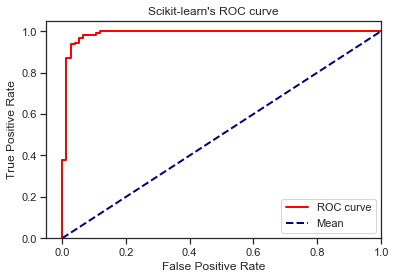

In [38]:
# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

### ROC-AUC score
Now, that we know about ROC curve, what it represents, **AUC score** is very easy to understand.  
AUC stands for **Area under the Curve**, which is nothing but the area under the ROC curve formed by the predictions.  
As we saw, a totally random prediction will have AUC score `0.5`, while a perfect classifier will have AUC score of `1`. 

Lets check the AUC score of our model.

In [40]:
auc_score = metrics.roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

Scikit's ROC-AUC score of SVC model is  0.9872


In [66]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_proba)
list(zip(precision,recall))

[(0.9328358208955224, 1.0),
 (0.9323308270676691, 0.992),
 (0.9393939393939394, 0.992),
 (0.9389312977099237, 0.984),
 (0.9461538461538461, 0.984),
 (0.9534883720930233, 0.984),
 (0.9609375, 0.984),
 (0.9606299212598425, 0.976),
 (0.9603174603174603, 0.968),
 (0.968, 0.968),
 (0.967741935483871, 0.96),
 (0.967479674796748, 0.952),
 (0.9672131147540983, 0.944),
 (0.9752066115702479, 0.944),
 (0.975, 0.936),
 (0.9831932773109243, 0.936),
 (0.9830508474576272, 0.928),
 (0.9829059829059829, 0.92),
 (0.9827586206896551, 0.912),
 (0.9826086956521739, 0.904),
 (0.9824561403508771, 0.896),
 (0.9823008849557522, 0.888),
 (0.9821428571428571, 0.88),
 (0.9819819819819819, 0.872),
 (0.990909090909091, 0.872),
 (0.9908256880733946, 0.864),
 (0.9907407407407407, 0.856),
 (0.9906542056074766, 0.848),
 (0.9905660377358491, 0.84),
 (0.9904761904761905, 0.832),
 (0.9903846153846154, 0.824),
 (0.9902912621359223, 0.816),
 (0.9901960784313726, 0.808),
 (0.9900990099009901, 0.8),
 (0.99, 0.792),
 (0.989898

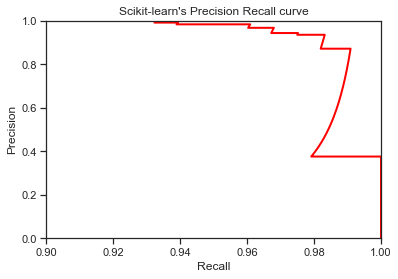

In [65]:
plt.plot(precision, recall, color='red', lw=2)
plt.xlim([0.9, 1.0])
plt.ylim([0., 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Scikit-learn's Precision Recall curve")
plt.show()